<a href="https://colab.research.google.com/github/apollonov-evgeniy/2/blob/main/proj7_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81_%D1%83%D1%87%D0%B8%D1%82%D0%B5%D0%BB%D0%B5%D0%BC_%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7_%D0%BE%D0%BE%D1%82%D0%BE%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%B1%D0%B0%D0%BD%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Этот проект выполнен довольно хорошо.
* Молодец, что структурируешь ноутбук, приятно проверять такие работы.
* Отлично, что правильно использованы train/valid/test наборы.
* Я оставил несколько советов, надеюсь, что они будут учтены в будущих проектах.
* Тебе удалось добиться очень хорошего качества, поздравляю!
* Редко, кто сдает эту работу с первого раза, молодец!
* Данный проект зачтен. Удачи в дальнейшем обучении!

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [ ]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)


Инструкция по выполнению проекта  

1. Загрузите и подготовьте данные. Поясните порядок действий.  
2. Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.  
3. Улучшите качество модели, учитывая дисбаланс классов. Обучите разные модели и найдите лучшую. Кратко опишите выводы.  
4. Проведите финальное тестирование.   

Описание данных  
Данные находятся в файле /datasets/Churn.csv (англ. «отток клиентов»).   

Признаки  
RowNumber — индекс строки в данных  
CustomerId — уникальный идентификатор клиента  
Surname — фамилия  
CreditScore — кредитный рейтинг  
Geography — страна проживания  
Gender — пол  
Age — возраст  
Tenure — количество недвижимости у клиента  
Balance — баланс на счёте  
NumOfProducts — количество продуктов банка, используемых клиентом  
HasCrCard — наличие кредитной карты  
IsActiveMember — активность клиента  
EstimatedSalary — предполагаемая зарплата  
Целевой признак  
Exited — факт ухода клиента  

# 1. Подготовка данных

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно чтобы все импорты были собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [ ]:
# Задаем некоторые опции библиотеки pandas, которые
# настраивают вывод
pd.set_option('display.max_rows', 30)
pd.set_option('display.width', 80)
# увеличиваем количество выводимых столбцов
pd.set_option('display.max_columns', 60)
pd.set_option('display.float_format', lambda x: '%.3f' % x)#формат вывода для удобства

In [ ]:
data = pd.read_csv('Churn.csv')
try:
    df = pd.read_csv("Churn.csv")
except:
    try:
        df = pd.read_csv("/datasets/Churn.csv")
    except:
        df = pd.read_csv("https://code.s3.yandex.net/datasets/Churn.csv")
finally:
    display(df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.000,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1.000,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8.000,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1.000,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.000,125510.820,1,1,1,79084.100,0


In [ ]:
data.shape

(10000, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Пропуски есть только Tenure (количество недвижимости у клиента)

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,9091.000,4.998,2.895,0.000,2.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [ ]:
data.describe(include=['object'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [ ]:
data['CustomerId'].nunique()
# все значения уникальны. Далее сделаем этот столбей индексами

10000

Провели обзор данных. Обработка пропусков нужна столбцу Tenure.

Есть вариант замены пропусков значением медианы, либо, 
как вариант, в условии указано, что данные взяты из kaggle.   
Воспользуемся оригинальными данными.  
Оригинальный файл Churn_Modelling.csv скачаем  
и положим на google drive (чтобы не использовать kaggle API)
Далее сравним два датасета. При совпадении будем использовать данные для пропусков в столбце Tenure из оригинального датасета


<div class="alert alert-block alert-success">
<b>Успех:</b> Загрузка и первичный анализ данных были проведены верно.
</div>

In [ ]:
url = 'https://drive.google.com/file/d/1tjt_-XT1jJygO0_ubYX1l6l6RIow_vXe/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data_origin = pd.read_csv(path)
print('Ссылка на скачивание файла Churn_Modelling.csv', path)

#ind =  data and data1
data_origin.head()

Ссылка на скачивание файла Churn_Modelling.csv https://drive.google.com/uc?export=download&id=1tjt_-XT1jJygO0_ubYX1l6l6RIow_vXe


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [ ]:
data_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# сравним файл данный для работы и файл из ссылки в kaggle.
data[data == data_origin].count()
# файлы идентичны

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure              9091
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [ ]:
# вариант замены пропусков на медиану
# data = data.fillna(data['Tenure'].median())
# data.isna().sum()

In [ ]:
# вариант использования в качестве данных оригинального файла из kaggle
data = data_origin.copy()


<div class="alert alert-block alert-success">
<b>Успех:</b> Интересное решение.
</div>

Сделаем замену наименований на нижний регистр с раздением нижний чертой.

In [ ]:
new_columns = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',\
               'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary', 'exited']
data.columns = new_columns
data.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


Удалим столбец: row_number, surname

Выше мы посмотрели, что значения столбца customer_id уникальны, сделаем его индексом

In [ ]:
data =  data.drop(columns=['row_number', 'surname'], axis = 1)
data = data.set_index('customer_id')
data.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
customer_id,,,,,,,,,,,
15634602,619,France,Female,42,2,0.000,1,1,1,101348.880,1
15647311,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
15619304,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
15701354,699,France,Female,39,1,0.000,2,0,0,93826.630,0
15737888,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


## Вывод:¶
Сделана  замена значений признака "tenure" (количество недвижимости у клиента), на значения из оригинального датафрейма.

Проблем в данных не обнаружено

Имеется 3 категориальных признака: Surname, Gender, Geography и один бинарный: Exited. Для дальнешего обучения нужно удалить: признак Surname, т.к. он не несет никого влияния, идентификатор клиента - customer_id и row_number - индентификатор строки. Признаки: gender, geography - нужно преобразовать в бинарные методологией OHE (one-hot encoding). 

Следующим шагом будет разделение выборок и приведение количественных признаков к единому масштабу, чтобы исключить разновесовое влияние.

<div class="alert alert-block alert-success">
<b>Успех:</b> В целом, этот шаг был сделан хорошо. Согласен, что эти колонки нам не нужны.
</div>

# 2. Исследование задачи

In [ ]:
# Разделим данные на признаки X и целевую переменную y

X = data.drop(columns=['exited'])
y = data['exited']


0   79.630
1   20.370
Name: exited, dtype: float64


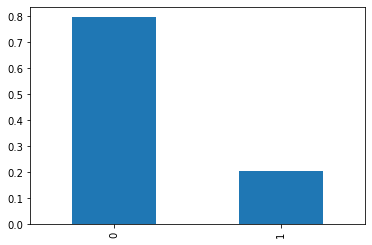

In [ ]:
print('')
print(y.value_counts()/len(y)*100)

y.value_counts(normalize = True).plot(kind = 'bar')

* _Видим, что выборка не сбалансирована_

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что дисбаланс был визуализирован.
</div>

In [ ]:
# Применение демми-признаков (ohe)
X = pd.get_dummies(X, drop_first = True)
X.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
customer_id,,,,,,,,,,,
15634602,619,42,2,0.000,1,1,1,101348.880,0,0,0
15647311,608,41,1,83807.860,1,0,1,112542.580,0,1,0
15619304,502,42,8,159660.800,3,1,0,113931.570,0,0,0
15701354,699,39,1,0.000,2,0,0,93826.630,0,0,0
15737888,850,43,2,125510.820,1,1,1,79084.100,0,1,0


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.40, random_state=12345, stratify=y) #

In [ ]:
X_valid, X_test, y_valid, y_test = train_test_split(
    X_valid, y_valid, test_size=0.50, random_state=12345, stratify=y_valid) #

In [ ]:
print(f"train = {100*len(X_train)/len(X):.2f}%")
print(f"valid = {100*len(X_valid)/len(X):.2f}%")
print(f"test = {100*len(X_test)/len(X):.2f}%")

train = 60.00%
valid = 20.00%
test = 20.00%


In [ ]:
column_for_scaled = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

In [ ]:
scaler = StandardScaler()

In [ ]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

In [ ]:
scaler.fit(X_train[column_for_scaled])

StandardScaler()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

X_train[column_for_scaled] = scaler.transform(X_train[column_for_scaled])
X_valid[column_for_scaled] = scaler.transform(X_valid[column_for_scaled])
X_test[column_for_scaled] = scaler.transform(X_test[column_for_scaled])

Разбили на три выборки. Обучающая, валидационная, тестовая по схеме 60:20:20 с сохранением баланса класса
Применили метод OHE c обходом дамми ловушек. Маштабирование некоторых числовых признаков.

<div class="alert alert-block alert-success">
<b>Успех:</b> Разбиение проведено абсолютно верно. радует, что scaler был обучен только на тренировочной выборке. Это помогает уменьшить переобучение.
</div>

In [ ]:
# Дерево решений
def tree(tree_name, X_train, y_train, X_valid, y_valid, weight=None):
    tree_result = pd.DataFrame(columns = 
            ['name','depth', 'accuracy_train', 'accuracy_valid', 'f1','c_matrix','auc_roc_tree_valid'])

    for depth in range(1, 15, 1):
        model_tree = DecisionTreeClassifier(max_depth=depth, random_state=12345, class_weight = weight)
        model_tree.fit(X_train, y_train)
        predictions_tree_train = model_tree.predict(X_train)
        predictions_tree_valid = model_tree.predict(X_valid)
        accuracy_tree_train = accuracy_score(y_train, predictions_tree_train)
        accuracy_tree_valid = accuracy_score(y_valid, predictions_tree_valid)
        f1_tree_valid = f1_score(y_valid, predictions_tree_valid)
    
        c_matrix_valid = confusion_matrix(y_valid, predictions_tree_valid)
        probabilities_valid = model_tree.predict_proba(X_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc_tree_valid = roc_auc_score(y_valid, probabilities_one_valid)
        tree_result.loc[len(tree_result)] = (
            [tree_name,depth,accuracy_tree_train,accuracy_tree_valid,f1_tree_valid,c_matrix_valid,auc_roc_tree_valid]
        )
    
    tree_result
    print('Максимальное значение f1_score модели "Дерево решений" на валидационной выборке:', tree_result.f1.max())
    max_accuracy = tree_result.f1.max()
    tree_result_max = tree_result.query('f1 == @max_accuracy')
    print(tree_result_max.transpose())
    return tree_result_max

In [ ]:
#  Случайный лес
def forest(forest_name, X_train, y_train, X_valid, y_valid, weight=None):
    
    forest_result = pd.DataFrame(columns = ['name', 'estim', 'depth', 'accuracy_train', 'accuracy_valid', 'f1', 'c_matrix_valid','auc_roc_forest_valid'])

    for estim in range(1, 101, 5):
        for depth in range(1, 11, 1):
            model_forest =( 
                RandomForestClassifier(n_estimators=estim, 
                max_depth=depth, random_state=12345, class_weight = weight)
            )    
            model_forest.fit(X_train, y_train)
            predictions_forest_train = model_forest.predict(X_train)
            predictions_forest_valid = model_forest.predict(X_valid)
            accuracy_forest_train = accuracy_score(y_train, predictions_forest_train)
            accuracy_forest_valid = accuracy_score(y_valid, predictions_forest_valid)
            accuracy_forest_f1 = f1_score(y_valid, predictions_forest_valid)
        
            c_matrix_valid = confusion_matrix(y_valid, predictions_forest_valid)
            probabilities_valid = model_forest.predict_proba(X_valid)
            probabilities_one_valid = probabilities_valid[:, 1]
            auc_roc_forest_valid = roc_auc_score(y_valid, probabilities_one_valid)
            forest_result.loc[len(forest_result)] =(
            [forest_name, estim,depth,accuracy_forest_train,accuracy_forest_valid,accuracy_forest_f1,c_matrix_valid,auc_roc_forest_valid]
            )
    forest_result.sort_values(by='f1',ascending=False).head(10) 
    print('Максимальное значение f1_score модели "Случайный лес" на валидационной выборке:', forest_result.f1.max())
    max_accuracy = forest_result.f1.max()
    forest_result_max = forest_result.query('f1 == @max_accuracy')
    print(forest_result_max.transpose())
    return forest_result_max

In [ ]:
# Логическая регрессия
def logistic(log_name, X_train, y_train, X_valid, y_valid, weight=None):
    log_result = pd.DataFrame(columns = ['name', 'f1', 'c_matrix_valid','auc_roc_log'])
    model_LogisticRegression = LogisticRegression(random_state=12345, solver='liblinear',class_weight = weight)
    model_LogisticRegression.fit(X_train, y_train)
    predicted_valid = model_LogisticRegression.predict(X_valid)
    c_matrix_valid = confusion_matrix(y_valid, predicted_valid)
    log_f1= f1_score(y_valid, predicted_valid)
    probabilities_valid = model_LogisticRegression.predict_proba(X_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc_log_valid = roc_auc_score(y_valid, probabilities_one_valid)
    log_result.loc[len(log_result)] =(
            [log_name, log_f1,c_matrix_valid,auc_roc_log_valid]
            )
    print(log_result.transpose())
    
    return log_result

<div class="alert alert-block alert-success">
<b>Успех:</b> Приятно видеть, что ты сделал универсальный функции.
</div>

In [ ]:
tree_max = tree('дерево с дисбалансом',X_train, y_train, X_valid, y_valid)

Максимальное значение f1_score модели "Дерево решений" на валидационной выборке: 0.5933429811866859
                                           6
name                    дерево с дисбалансом
depth                                      7
accuracy_train                         0.871
accuracy_valid                         0.860
f1                                     0.593
c_matrix            [[1514, 78], [203, 205]]
auc_roc_tree_valid                     0.824


In [ ]:
forest_max = forest('лес с дисбалансом',X_train, y_train, X_valid, y_valid)

Максимальное значение f1_score модели "Случайный лес" на валидационной выборке: 0.6036269430051813
                                              3
name                          лес с дисбалансом
estim                                         1
depth                                         4
accuracy_train                            0.843
accuracy_valid                            0.847
f1                                        0.604
c_matrix_valid        [[1461, 131], [175, 233]]
auc_roc_forest_valid                      0.814


In [ ]:
log_max = logistic('логическая с дисбалансом',X_train, y_train, X_valid, y_valid)

                                       0
name            логическая с дисбалансом
f1                                 0.308
c_matrix_valid   [[1538, 54], [324, 84]]
auc_roc_log                        0.787


### Вывод   

Рассмотрены три модели. Лучший результат получился на модели "Случайный лес".
При подборе гиперпараметров получилось довести значение F1 до 0.616, это видно и из результатов confusion_matrix и auc_roc.  
(вначале был вариант замены пропусков "Tenure" на медиану. При этом значение F1 незначительно ниже на всех моделях, например 0,606(медиана) - 0,616 (оригинал) на Случайном лесе)  
Далее будем пытаться улучшить этот результат борясь с дисбалансом


# 3. Борьба с дисбалансом

In [ ]:
# Обучение модели решаюшего дерево при сбаланстрованном весе классов.
tree_max = tree_max.append(tree('дерево сбалансированный',X_train, y_train, X_valid, y_valid, "balanced"))
forest_max = forest_max.append(forest('лес сбалансированный',X_train, y_train, X_valid, y_valid, "balanced"))
log_max = log_max.append(logistic('логическая сбалансированный',X_train, y_train, X_valid, y_valid, "balanced"))

Максимальное значение f1_score модели "Дерево решений" на валидационной выборке: 0.5764596848934197
                                           5
name                 дерево сбалансированный
depth                                      6
accuracy_train                         0.783
accuracy_valid                         0.771
f1                                     0.576
c_matrix            [[1232, 360], [97, 311]]
auc_roc_tree_valid                     0.828
Максимальное значение f1_score модели "Случайный лес" на валидационной выборке: 0.6492374727668845
                                            197
name                       лес сбалансированный
estim                                        96
depth                                         8
accuracy_train                            0.868
accuracy_valid                            0.839
f1                                        0.649
c_matrix_valid        [[1380, 212], [110, 298]]
auc_roc_forest_valid                      0.871
         

In [ ]:
# Функция для увеличение выборки
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [ ]:
#Применение функции увеличения выборки к датафрейму 
X_upsampled, y_upsampled = upsample(X_train, y_train, 10)


<div class="alert alert-block alert-info">
<b>Совет: </b> Не очень понятно, почему repeat = 10, разве теперь классы сбалансированы?
</div>

In [ ]:
# Обучение модели случайного леса с увеличеной выборкойю

tree_max = tree_max.append(tree('дерево увеличение выборки',X_upsampled, y_upsampled, X_valid, y_valid))
forest_max = forest_max.append(forest('лес увеличение выборки',X_upsampled, y_upsampled, X_valid, y_valid))
log_max = log_max.append(logistic('логическая увеличение выборки',X_upsampled, y_upsampled, X_valid, y_valid))

Максимальное значение f1_score модели "Дерево решений" на валидационной выборке: 0.537984496124031
                                            5
name                дерево увеличение выборки
depth                                       6
accuracy_train                          0.821
accuracy_valid                          0.702
f1                                      0.538
c_matrix             [[1057, 535], [61, 347]]
auc_roc_tree_valid                      0.836
Максимальное значение f1_score модели "Случайный лес" на валидационной выборке: 0.5823429541595925
                                           119
name                    лес увеличение выборки
estim                                       56
depth                                       10
accuracy_train                           0.933
accuracy_valid                           0.754
f1                                       0.582
c_matrix_valid        [[1165, 427], [65, 343]]
auc_roc_forest_valid                     0.860
           

In [ ]:
# Функция для уменьшения выборки 
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled



In [ ]:
# Применение функций уменьшения вывборки к датафрэйму без категориальных прризнаков
X_downsampled, y_downsampled = downsample(X_train, y_train, 0.5)

In [ ]:
# Обучение модели случайного леса при уменьшеной выборке
tree_max = tree_max.append(tree('дерево уменьшение выборки',X_downsampled, y_downsampled, X_valid, y_valid))
forest_max = forest_max.append(forest('лес уменьшение',X_downsampled, y_downsampled, X_valid, y_valid))
log_max = log_max.append(logistic('логическая уменьшение',X_downsampled, y_downsampled, X_valid, y_valid))

Максимальное значение f1_score модели "Дерево решений" на валидационной выборке: 0.6103183315038418
                                            6
name                дерево уменьшение выборки
depth                                       7
accuracy_train                          0.832
accuracy_valid                          0.823
f1                                      0.610
c_matrix            [[1367, 225], [130, 278]]
auc_roc_tree_valid                      0.830
Максимальное значение f1_score модели "Случайный лес" на валидационной выборке: 0.6550435865504359
                                            169
name                             лес уменьшение
estim                                        81
depth                                        10
accuracy_train                            0.907
accuracy_valid                            0.862
f1                                        0.655
c_matrix_valid        [[1460, 132], [145, 263]]
auc_roc_forest_valid                      0.871
 

In [ ]:
display(tree_max)
display(forest_max)
display(log_max)

,name,depth,accuracy_train,accuracy_valid,f1,c_matrix,auc_roc_tree_valid
6,дерево с дисбалансом,7,0.871,0.860,0.593,"[[1514, 78], [203, 205]]",0.824
5,дерево сбалансированный,6,0.783,0.771,0.576,"[[1232, 360], [97, 311]]",0.828
5,дерево увеличение выборки,6,0.821,0.702,0.538,"[[1057, 535], [61, 347]]",0.836
6,дерево уменьшение выборки,7,0.832,0.823,0.610,"[[1367, 225], [130, 278]]",0.830


,name,estim,depth,accuracy_train,accuracy_valid,f1,c_matrix_valid,auc_roc_forest_valid
3,лес с дисбалансом,1,4,0.843,0.847,0.604,"[[1461, 131], [175, 233]]",0.814
197,лес сбалансированный,96,8,0.868,0.839,0.649,"[[1380, 212], [110, 298]]",0.871
119,лес увеличение выборки,56,10,0.933,0.754,0.582,"[[1165, 427], [65, 343]]",0.860
169,лес уменьшение,81,10,0.907,0.862,0.655,"[[1460, 132], [145, 263]]",0.871


,name,f1,c_matrix_valid,auc_roc_log
0,логическая с дисбалансом,0.308,"[[1538, 54], [324, 84]]",0.787
0,логическая сбалансированный,0.530,"[[1165, 427], [107, 301]]",0.794
0,логическая увеличение выборки,0.419,"[[553, 1039], [25, 383]]",0.796
0,логическая уменьшение,0.487,"[[1409, 183], [218, 190]]",0.791


Лучшей модель для данного запроса RandomForestClassifier, обученную на уменьшенной выборке с параметрами n_estimators =81, max_depth =10

Так же можно рассматривать модель RandomForestClassifier, с применением class_weight='balanced',с параметрами n_estimators =81, max_depth =10, auc_roc у обоих моделей одинаковое.  
Рассмотрим оба варианта нав тестировании.

<div class="alert alert-block alert-success">
<b>Успех:</b> Молодец, что попробовал несколько методов борьбы с дисбалансом классов и собрал все результаты вместе.
</div>

# 4. Тестирование модели

In [ ]:
# Тестируем модель случайого леса на уменьшенной выборке 
model_test =  RandomForestClassifier(random_state=12345, n_estimators= 81, max_depth = 10)
model_test.fit(X_downsampled, y_downsampled)
predicted_test = model_test.predict(X_test)


f1 = f1_score(y_test, predicted_test)
c_matrix = confusion_matrix(y_test, predicted_test)

probabilities = model_test.predict_proba(X_test)
probabilities_one = probabilities[:, 1]
auc_roc_valid = roc_auc_score(y_test, probabilities_one)
print('f1', f1)
print('c_matrix')
print( c_matrix)
print('auc_roc_valid', auc_roc_valid)

f1 0.5938303341902312
c_matrix
[[1453  140]
 [ 176  231]]
auc_roc_valid 0.8531058022583446


In [ ]:
# Тестируем модель случайого леса на Сбалансированной выборке
model_test =  RandomForestClassifier(random_state=12345, n_estimators= 96, max_depth = 8, class_weight = "balanced")
model_test.fit(X_train, y_train)
predicted_test = model_test.predict(X_test)


f1 = f1_score(y_test, predicted_test)
c_matrix = confusion_matrix(y_test, predicted_test)

probabilities = model_test.predict_proba(X_test)
probabilities_one = probabilities[:, 1]
auc_roc_valid = roc_auc_score(y_test, probabilities_one)
print('f1', f1)
print('c_matrix')
print( c_matrix)
print('auc_roc_valid', auc_roc_valid)

f1 0.6026490066225165
c_matrix
[[1367  226]
 [ 134  273]]
auc_roc_valid 0.8535237857271756


При тестовой выборке получили значения f1 = 0.603 , что высше чем по заданию

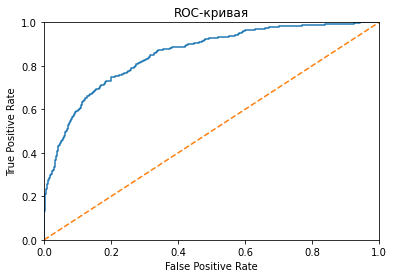

0.8535237857271756


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, probabilities_one)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.show()

print(auc_roc_valid)

### Вывод
Площадь под крривой бельше чем 0,5 то есть положительная, и кривая достаточно различается от случайного резултата,  что свидительствует о качестве выбраной модели

<div class="alert alert-block alert-success">
<b>Успех:</b> Тестирование проведено корректно, радует, что ROC-кривая была визуализирована.
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Финальный выовд можно было бы сделать более подробным.
</div>

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [х]  Jupyter Notebook открыт
- [х]  Весь код выполняется без ошибок
- [х]  Ячейки с кодом расположены в порядке исполнения
- [х]  Выполнен шаг 1: данные подготовлены
- [х]  Выполнен шаг 2: задача исследована
    - [х]  Исследован баланс классов
    - [х]  Изучены модели без учёта дисбаланса
    - [х]  Написаны выводы по результатам исследования
- [х]  Выполнен шаг 3: учтён дисбаланс
    - [х]  Применено несколько способов борьбы с дисбалансом
    - [х]  Написаны выводы по результатам исследования
- [х]  Выполнен шаг 4: проведено тестирование
- [х]  Удалось достичь *F1*-меры не менее 0.59
- [х]  Исследована метрика *AUC-ROC*